In [11]:
import random
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Add, Activation

%matplotlib inline

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

6


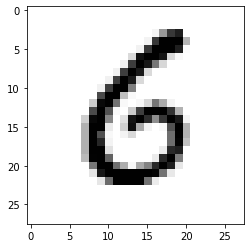

In [3]:
# Show an example image from the training data along with its label
index = int(random.random()*len(x_train))
print(y_train[index])
plt.imshow(x_train[index], cmap='Greys')

In [5]:
# 60k training examples, 28 x 28 pixel images
print(x_train.shape)
# 10k testing examples
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# Reshape, only one layer (grayscale)
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [8]:
# Normalize
x_train /= 255.0
x_test /= 255.0

In [63]:
# Create model - convolution, pooling, flatten, relu, dropout, softmax
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.1975 - accuracy: 0.9414
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0827 - accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0551 - accuracy: 0.9826
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0413 - accuracy: 0.9870
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0327 - accuracy: 0.9894


In [65]:
# Pretty much the same despite having twice as many neurons in the second to last layer
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/step


[0.053561915939213944, 0.9830999970436096]

Prediction: 2
Actual: 2


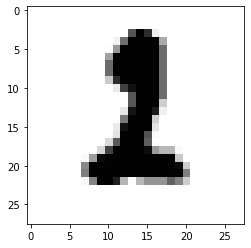

In [139]:
# Show an example image from the training data along with its label
# and its predicted label from the model
index = int(random.random()*len(x_test))
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print('Prediction: {}'.format(pred.argmax()))
print('Actual: {}'.format(y_test[index]))
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
# Looks like a 1 to me...

In [13]:
# Verify CUDA installation and compare GPU training speed to CPU
with tf.device('/CPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
with tf.device('/GPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
# I don't have a great GPU, but it's better than nothing.

Epoch 1/1
60000/60000 [==============================] - 19s 315us/step - loss: 0.0252 - accuracy: 0.9912
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.0234 - accuracy: 0.9922


In [153]:
#Try some different architectures
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation=tf.nn.relu))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation=tf.nn.softmax))

In [154]:
model2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(x=x_train, y=y_train, epochs=5, batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.5017 - accuracy: 0.8469
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1613 - accuracy: 0.9537
Epoch 3/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1194 - accuracy: 0.9651
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0991 - accuracy: 0.9695
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0839 - accuracy: 0.9757


In [155]:
# Barely better
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 142us/step


[0.03603210315018077, 0.9883999824523926]

In [156]:
model3 = Sequential()
model3.add(Dropout(0.1))
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(64, activation=tf.nn.relu))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation=tf.nn.softmax))

In [159]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(x=x_train, y=y_train, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0795 - accuracy: 0.9755
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0707 - accuracy: 0.9783
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0639 - accuracy: 0.9800
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0532 - accuracy: 0.9829
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0469 - accuracy: 0.9853
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0440 - accuracy: 0.9864
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0413 - accuracy: 0.9868
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0390 - accuracy: 0.9871
Epoch 10/10
60000/60000 [==============================

In [160]:
#This one was much faster, and slightly better.
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 106us/step


[0.028460302224976475, 0.9907000064849854]

In [15]:
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
y1 = Conv2D(64, 3, activation='relu', padding='same')(x)
y1 = BatchNormalization()(y1)
y1 = Conv2D(64, 3, activation=None, padding='same')(y1)
y1 = BatchNormalization()(y1)
y1 = Add()([x, y1])
y1 = Activation('relu')(y1)
y2 = Conv2D(64, 3, activation='relu', padding='same')(y1)
y2 = BatchNormalization()(y2)
y2 = Conv2D(64, 3, activation=None, padding='same')(y2)
y2 = BatchNormalization()(y2)
y2 = Add()([y1, y2])
y2 = Activation('relu')(y2)
z = Conv2D(64, 3, activation='relu')(y2)
z = MaxPooling2D(2)(z)
z = Flatten()(z)
z = Dense(256, activation='relu')(z)
z = Dropout(0.2)(z)
outputs = Dense(10, activation='softmax')(z)

model4 = keras.Model(inputs, outputs)

In [16]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model4.fit(x=x_train, y=y_train, batch_size=512, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2691 - accuracy: 0.9251
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0304 - accuracy: 0.9906
Epoch 4/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0251 - accuracy: 0.9922
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0204 - accuracy: 0.9937
Epoch 6/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0157 - accuracy: 0.9949
Epoch 7/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0118 - accuracy: 0.9964
Epoch 8/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0102 - accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0088 - accuracy: 0.9972
Epoch 10/10
60000/60000 [============

In [37]:
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 207us/step


[0.024909546506872084, 0.9932000041007996]

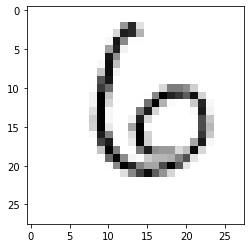

In [22]:
plt.imshow(x_test[100].reshape(28,28), cmap='Greys')

In [41]:
vals = []
for i in range(10000):
    vals.append([y_test[i], model4.predict(x_test[i].reshape(1,28,28,1)).argmax()])

In [44]:
mismatch = []
for i in range(10000):
    if vals[i][0] != vals[i][1]:
        mismatch.append([i, vals[i][0], vals[i][1]])

In [45]:
mismatch

[[115, 4, 9],
 [340, 5, 3],
 [449, 3, 5],
 [582, 8, 3],
 [684, 7, 2],
 [740, 4, 9],
 [846, 7, 9],
 [947, 8, 9],
 [1014, 6, 5],
 [1039, 7, 1],
 [1242, 4, 9],
 [1260, 7, 1],
 [1393, 5, 3],
 [1459, 2, 3],
 [1500, 7, 3],
 [1522, 7, 9],
 [1737, 5, 3],
 [1878, 8, 3],
 [1901, 9, 4],
 [2070, 7, 9],
 [2130, 4, 9],
 [2182, 1, 3],
 [2293, 9, 4],
 [2447, 4, 9],
 [2454, 6, 5],
 [2597, 5, 3],
 [2654, 6, 1],
 [2771, 4, 9],
 [2896, 8, 0],
 [2939, 9, 5],
 [2953, 3, 5],
 [2959, 2, 3],
 [2995, 6, 5],
 [3073, 1, 2],
 [3225, 7, 9],
 [3422, 6, 0],
 [3441, 7, 2],
 [3520, 6, 4],
 [3534, 4, 8],
 [3767, 7, 2],
 [3906, 1, 3],
 [3941, 4, 6],
 [4199, 7, 9],
 [4382, 4, 9],
 [4536, 6, 5],
 [4571, 6, 8],
 [4783, 4, 9],
 [4860, 4, 9],
 [4911, 4, 9],
 [5165, 0, 6],
 [5201, 4, 9],
 [5936, 4, 9],
 [5937, 5, 3],
 [5981, 5, 9],
 [5997, 5, 9],
 [6571, 9, 5],
 [6576, 7, 1],
 [6597, 0, 3],
 [6651, 0, 6],
 [6783, 1, 6],
 [7902, 7, 9],
 [8061, 4, 9],
 [8316, 7, 2],
 [8527, 4, 9],
 [9505, 7, 2],
 [9664, 2, 7],
 [9729, 5, 6],
 [9

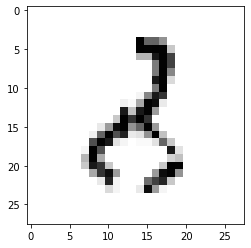

In [49]:
# wtf is this? 
plt.imshow(x_test[582].reshape(28,28), cmap='Greys')

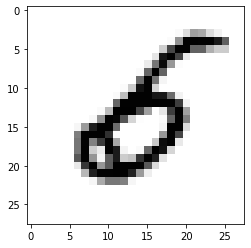

In [61]:
# I swear this is a 6.
plt.imshow(x_test[9729].reshape(28,28), cmap='Greys')

In [62]:
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Dropout(0.1)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(2)(x)
y1 = Conv2D(64, 3, activation='relu', padding='same')(x)
y1 = Dropout(0.1)(y1)
y1 = BatchNormalization()(y1)
y1 = Conv2D(64, 3, activation=None, padding='same')(y1)
y1 = Dropout(0.1)(y1)
y1 = BatchNormalization()(y1)
y1 = Add()([x, y1])
y1 = Activation('relu')(y1)
y2 = Conv2D(64, 3, activation='relu', padding='same')(y1)
y2 = Dropout(0.1)(y2)
y2 = BatchNormalization()(y2)
y2 = Conv2D(64, 3, activation=None, padding='same')(y2)
y2 = Dropout(0.1)(y2)
y2 = BatchNormalization()(y2)
y2 = Add()([y1, y2])
y2 = Activation('relu')(y2)
z = Conv2D(64, 3, activation='relu')(y2)
z = Dropout(0.1)(z)
z = MaxPooling2D(2)(z)
z = Flatten()(z)
z = Dense(256, activation='relu')(z)
z = Dropout(0.2)(z)
outputs = Dense(10, activation='softmax')(z)

model5 = keras.Model(inputs, outputs)

In [63]:
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model5.fit(x_train, y_train, batch_size=1000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 442us/step - loss: 0.7608 - accuracy: 0.7875
Epoch 2/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0853 - accuracy: 0.9728
Epoch 3/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0566 - accuracy: 0.9827
Epoch 4/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0422 - accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 24s 406us/step - loss: 0.0337 - accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0282 - accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0242 - accuracy: 0.9922
Epoch 8/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0218 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 10/10
60000/60000 [============

In [64]:
model5.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 249us/step


[0.020051686681550926, 0.9939000010490417]

In [69]:
# ~20 layers deep?
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
y1 = Conv2D(64, 3, activation='relu', padding='same')(x)
y1 = BatchNormalization()(y1)
y1 = Conv2D(64, 3, activation=None, padding='same')(y1)
y1 = BatchNormalization()(y1)
y1 = Add()([x, y1])
y1 = Activation('relu')(y1)
y2 = Conv2D(64, 3, activation='relu', padding='same')(y1)
y2 = BatchNormalization()(y2)
y2 = Conv2D(64, 3, activation=None, padding='same')(y2)
y2 = BatchNormalization()(y2)
y2 = Add()([y1, y2])
y2 = Activation('relu')(y2)
y3 = Conv2D(64, 3, activation='relu', padding='same')(y2)
y3 = BatchNormalization()(y3)
y3 = Conv2D(64, 3, activation=None, padding='same')(y3)
y3 = BatchNormalization()(y3)
y3 = Add()([y2, y3])
y3 = Activation('relu')(y3)
y4 = Conv2D(64, 3, activation='relu', padding='same')(y3)
y4 = BatchNormalization()(y4)
y4 = Conv2D(64, 3, activation=None, padding='same')(y4)
y4 = BatchNormalization()(y4)
y4 = Add()([y3, y4])
y4 = Activation('relu')(y4)
y5 = Conv2D(64, 3, activation='relu', padding='same')(y4)
y5 = BatchNormalization()(y5)
y5 = Conv2D(64, 3, activation=None, padding='same')(y5)
y5 = BatchNormalization()(y5)
y5 = Add()([y4, y5])
y5 = Activation('relu')(y5)
y6 = Conv2D(64, 3, activation='relu', padding='same')(y5)
y6 = BatchNormalization()(y6)
y6 = Conv2D(64, 3, activation=None, padding='same')(y6)
y6 = BatchNormalization()(y6)
y6 = Add()([y5, y6])
y6 = Activation('relu')(y6)
y7 = Conv2D(64, 3, activation='relu', padding='same')(y6)
y7 = BatchNormalization()(y7)
y7 = Conv2D(64, 3, activation=None, padding='same')(y7)
y7 = BatchNormalization()(y7)
y7 = Add()([y6, y7])
y7 = Activation('relu')(y7)
y8 = Conv2D(64, 3, activation='relu', padding='same')(y7)
y8 = BatchNormalization()(y8)
y8 = Conv2D(64, 3, activation=None, padding='same')(y8)
y8 = BatchNormalization()(y8)
y8 = Add()([y7, y8])
y8 = Activation('relu')(y8)
z = Conv2D(64, 3, activation='relu')(y8)
z = MaxPooling2D(2)(z)
z = Flatten()(z)
z = Dense(256, activation='relu')(z)
z = Dropout(0.25)(z)
outputs = Dense(10, activation='softmax')(z)

model6 = keras.Model(inputs, outputs)

In [70]:
model6.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model6.fit(x_train, y_train, batch_size=1000, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 54s 897us/step - loss: 0.7227 - accuracy: 0.8380
Epoch 2/100
60000/60000 [==============================] - 51s 847us/step - loss: 0.0611 - accuracy: 0.9817
Epoch 3/100
60000/60000 [==============================] - 51s 846us/step - loss: 0.0390 - accuracy: 0.9885
Epoch 4/100
60000/60000 [==============================] - 51s 845us/step - loss: 0.0296 - accuracy: 0.9909
Epoch 5/100
60000/60000 [==============================] - 51s 845us/step - loss: 0.0208 - accuracy: 0.9937
Epoch 6/100
60000/60000 [==============================] - 51s 845us/step - loss: 0.0184 - accuracy: 0.9941
Epoch 7/100
60000/60000 [==============================] - 51s 844us/step - loss: 0.0168 - accuracy: 0.9946
Epoch 8/100
60000/60000 [==============================] - 51s 844us/step - loss: 0.0125 - accuracy: 0.9961
Epoch 9/100
60000/60000 [==============================] - 51s 845us/step - loss: 0.0099 - accuracy: 0.9969
Epoch 10/100
60000/60000 [==

60000/60000 [==============================] - 51s 855us/step - loss: 0.0054 - accuracy: 0.9984
Epoch 77/100
60000/60000 [==============================] - 51s 853us/step - loss: 0.0064 - accuracy: 0.9979
Epoch 78/100
60000/60000 [==============================] - 51s 853us/step - loss: 0.0036 - accuracy: 0.9987
Epoch 79/100
60000/60000 [==============================] - 51s 855us/step - loss: 0.0039 - accuracy: 0.9987
Epoch 80/100
60000/60000 [==============================] - 51s 854us/step - loss: 0.0024 - accuracy: 0.9992
Epoch 81/100
60000/60000 [==============================] - 51s 853us/step - loss: 0.0029 - accuracy: 0.9991
Epoch 82/100
60000/60000 [==============================] - 51s 854us/step - loss: 0.0042 - accuracy: 0.9985
Epoch 83/100
60000/60000 [==============================] - 51s 853us/step - loss: 0.0019 - accuracy: 0.9994
Epoch 84/100
60000/60000 [==============================] - 51s 853us/step - loss: 0.0025 - accuracy: 0.9991
Epoch 85/100
60000/60000 [======

In [71]:
model6.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 488us/step


[0.03151751428373202, 0.9947999715805054]